In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [2]:
#%matplotlib notebook

 # Video i/p 

In [3]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/day-4 data/0 - 2019-12-19 19-35-05-273.mov")
cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/data from tata -14/0 - 2020-02-09 09-51-30-253.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Downloads/VID-20200106-WA0003.mp4")

#cap = cv2.VideoCapture("C:/Users/shrin/Desktop/openpose-master/openpose-master/build/examples/tutorial_api_python/abhilash.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

2243.0

In [4]:
cap.set(cv2.CAP_PROP_POS_FRAMES,100)

True

In [5]:
#%matplotlib notebook

(1520, 2592, 3)
(1520, 2592, 3)


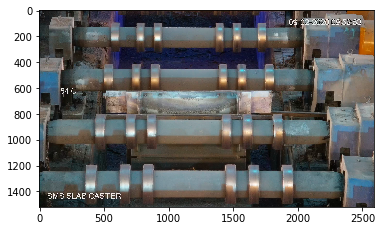

In [6]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
#frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
#resized = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), interpolation=cv2.INTER_LINEAR)
#print(frame.shape)
#frame = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), cv2.INTER_AREA)
print(frame.shape)
plt.imshow(frame)

In [7]:
[179,771,1330,771]

[308,888,1455,888]
#%matplotlib notebook

[308, 888, 1455, 888]

In [8]:
#cv2.imwrite("toTatat1.jpg",frame)

In [9]:
#%matplotlib notebook

# pixels Per Metric

In [10]:
#alar = [682,708,1095,685]
#alar = [510-9,800,1126-9,800]
#alar = [308,651,1203,651]
#alar = [257,647,1390,647]
#alar = [162,647,1548,647]
#alar = [325,1259,3111,1259] # 2x
#alar = [176,771,1330,771]
#alar = [313,888,1455 - 20,888]

alar = [313,888-100,1455 - 20,888-100]

#alar = [750,1259,2800,1259] # 2x

In [11]:
#drawLine = frame.copy()

dB = dist.euclidean(alar[:2],alar[-2:])
pixelsPerMetric = dB / 1690
print(1/pixelsPerMetric,"<<<<<-----------------MM per Pix")


1.5062388591800355 <<<<<-----------------MM per Pix


(1520, 2592)
(1520, 2592) <- - dst


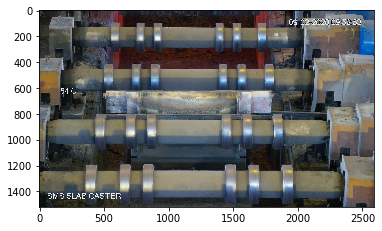

In [12]:
img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img.copy()) 
hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
hh,s,v = cv2.split(hsv)
yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb = cv2.split(yuv)


hls = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HLS)
h,l,ss = cv2.split(hls)

#randv = np.dstack((r,v),)
randv = cv2.addWeighted(y, -1.56, r, 2.8, 0.0)
print(randv.shape)

dst = cv2.addWeighted(y, 0.5, randv, 1.3, 0.0)
dst = cv2.line(dst,(alar[0],alar[1]),(alar[2],alar[3]),255,13)
#dst = cv2.addWeighted(v, .02, r, 1.6, 0.0)
print(dst.shape,"<- - dst")

img_Gray = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [13]:
%matplotlib notebook

leftCor = []
rightCor = []
save = []
while(True):
    ret, img = cap.read()
    
    #img = cv2.resize(img,(img.shape[1] ,img.shape[0] ), cv2.INTER_AREA)
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
    y,u,vb = cv2.split(yuv)
    
    randv = cv2.addWeighted(y, .5, r, 1.5, 0.0)  #good 220
    #print(randv.shape)
    
    randv = cv2.addWeighted(y, -1.56 , r, 2.9, 0.0)
    dst = cv2.addWeighted(y, -0.55, randv, 1.5, 0.0)
    #dst = cv2.addWeighted(v, .02, r, 1.251, 0.0) # threh 190
    
    blur = cv2.GaussianBlur(dst,(3,3),0)
    
    _,thresh = cv2.threshold(blur,158,255,cv2.THRESH_BINARY )
    
    #img = imutils.auto_canny(thresh)
    
    
    #_,thresh = cv2.threshold(blur,170,255,cv2.THRESH_BINARY) 
    #thresh = cv2.adaptiveThreshold(dst.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,-13)

    '''_ , contours, hierarchy =   cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    # cntr Order
    ordr = 0
    epsilon = 0.0001*cv2.arcLength(cnts[0],True)
    approx = cv2.approxPolyDP(cnts[0],epsilon,True)
    dstCnt = cv2.drawContours(img.copy(),[approx],ordr,(255),2)'''
    val = alar[1]
    
    
    #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
    if np.count_nonzero(thresh[val,]) >= 500:
        leftSide = np.nonzero(thresh[val,])[0][0] 
        rightSide = np.nonzero(thresh[val,])[0][-1] 
        leftCor.append(leftSide)
        rightCor.append(rightSide)
        #print(np.count_nonzero(thresh[816,]))
        mmPpix = ((1/pixelsPerMetric)* (rightSide - leftSide)) 
        print(mmPpix,",_______________________________")
        print("leftSide = ",leftSide,"rightSide = ", rightSide)
        print(blur[val,][leftSide :rightSide ])
        
        img  = cv2.line(img ,(np.nonzero(thresh[val,])[0][0] ,alar[1]),((np.nonzero(thresh[val,])[0][-1]) ,alar[3]),(255),2)
        
        #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
        
        img = cv2.circle(img,(leftSide,alar[1]) , 1, 0, 5)
        img = cv2.circle(img,(rightSide,alar[3]) , 1, 0, 5)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.putText(img,"{} mm".format(mmPpix),(0,330), font, 1.2 , (200,255,155), 2 , cv2.LINE_AA)

    
    #img1 = cv2.resize(img ,(int(1920),int(1080)))
    #img2 = cv2.resize(dstCnt,(500,300))
    #img3 = cv2.resize(thresh,(500,300))
    #save.append(img1)
    cv2.imshow('img ',img)
    #cv2.imshow('imgzzz ',dst)
    #cv2.imshow('img ',img3)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [14]:
window = 10

In [15]:
850+850

1700

In [16]:
sorted([1,2,3],reverse=True)[0]

3

In [17]:
break

SyntaxError: 'break' outside loop (<ipython-input-17-6aaf1f276005>, line 4)

# Normal 1080

In [ ]:
while(True):
    ret, img = cap.read()
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    trial = imgGray[alar[3],:]
    print("NEXT------------------------------------------------------------------------")
    maxValR = []
    maxValL = []
    for i in range (850,1700):
    #for i in range (850):

        avg = abs(int(sum(trial[i: i+window])/window - sum(trial[i+window: i+window+window ])/ window))
        #print(avg,")))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))")
        maxValR.append(avg)
        #print(img.shape)
        #img = cv2.circle(img,(i+1,alar[3]) , -1, (avg,0,0), 2)
        #print(i,"-------------------------------i------------------------------------------------")
        cv2.line(img,(i ,alar[3]),(i ,alar[3]-avg),(120+avg, 20+avg, 100*avg + 100),2)
        
        
        """---------------------------------------------/ LEFT-SIDE \---------------------------------------------------------"""
        
        avg_L = abs(int(sum(trial[(i - 850): ( i - 850 )+window])/window - sum(trial[(i - 850 )+window: (i - 850 )+window+window ])/ window))
        #print(avg_L,"*****************************************************************")
        maxValL.append(avg_L)
        cv2.line(img,((i - 850) ,alar[3]),( (i - 850)   ,alar[3]-avg_L),(120+avg_L, 20+avg_L, 100*avg_L + 100),2)
        
        
        
        '''avg_L = abs(int(sum(trial[i: i+window])/window - sum(trial[i+window: i+window+window ])/ window))
        #print(avg_L,"*****************************************************************")
        maxValL.append(avg_L)
        cv2.line(img,(i ,alar[3]),(i   ,alar[3]-avg_L),(120+avg_L, 20+avg_L, 100*avg_L + 100),2)'''
        
        
        
        
        #i+=3
        if i+window >= 1700:
            break
    
    
    cv2.circle(img,(maxValR.index(max(maxValR[-420:])) + 855,alar[3]) , 1, 0, 10)
    cv2.circle(img,(maxValL.index(max(maxValL[-420 - 200: -200])),alar[3]) , 1, 0, 10)
    cv2.imshow('img ',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
        
    

# 4MP 

In [ ]:
2*1148

In [18]:
while(True):
    ret, img = cap.read()
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    trial = imgGray[alar[3],:]
    print("NEXT------------------------------------------------------------------------")
    maxValR = []
    maxValL = []
    for i in range (1148,2296):
    #for i in range (1148):

        """---------------------------------------------/ RIGHT-SIDE \---------------------------------------------------------"""

        avg = abs(int(sum(trial[i: i+window])/window - sum(trial[i+window: i+window+window ])/ window))
        #print(avg,")))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))")
        maxValR.append(avg)
        #print(img.shape)
        #img = cv2.circle(img,(i+1,alar[3]) , -1, (avg,0,0), 2)
        #print(i,"-------------------------------i------------------------------------------------")
        cv2.line(img,(i ,alar[3]),(i ,alar[3]-avg),(120+avg, 20+avg, 100*avg + 100),2)
        
        
        """---------------------------------------------/ LEFT-SIDE \---------------------------------------------------------"""
        
        avg_L = abs(int(sum(trial[(i - 1148): ( i - 1148 )+window])/window - sum(trial[(i - 1148 )+window: (i - 1148 )+window+window ])/ window))
        #print(avg_L,"*****************************************************************")
        maxValL.append(avg_L)
        cv2.line(img,((i - 1148) ,alar[3]),( (i - 1148)   ,alar[3]-avg_L),(120+avg_L, 20+avg_L, 100*avg_L + 100),2)
        
        
        
        '''avg_L = abs(int(sum(trial[i: i+window])/window - sum(trial[i+window: i+window+window ])/ window))
        #print(avg_L,"*****************************************************************")
        maxValL.append(avg_L)
        cv2.line(img,(i ,alar[3]),(i   ,alar[3]-avg_L),(120+avg_L, 20+avg_L, 100*avg_L + 100),2)'''
        
        
        
        
        #i+=3
        if i+window >= 1700:
            break
    
    
    cv2.circle(img,(maxValR.index(max(maxValR[-420:])) + 855,alar[3]) , 1, 0, 10)
    cv2.circle(img,(maxValL.index(max(maxValL[-420 - 200: -200])),alar[3]) , 1, 0, 10)
    
    img1 = cv2.resize(img ,(int(1920),int(1080)))
    cv2.imshow('img ',img1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
        
    

NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------

NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------

NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------

NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------

NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------

NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------
NEXT------------------------------------------------------------------------

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10,48]

In [ ]:
a.index(max(a[-3:]))

In [ ]:
a[-5]

In [ ]:
maxValL.index(max(maxValL[-420:]))

In [ ]:
maxValL[-420:-200]